Title: Predicting Apparent Temperature with Machine Learning

Abstract:
This report presents a comprehensive study on predicting the apparent temperature using machine learning techniques. Apparent temperature is a measure of how hot or cold it feels to humans, which is different from the actual air temperature, as it considers factors like wind chill and humidity. Our objective is to develop a predictive model that can accurately forecast the apparent temperature based on historical weather data.

Introduction

Predicting the apparent temperature is vital for accurate weather forecasting and has significant implications for public health, agriculture, and daily human activities. The apparent temperature is influenced by various meteorological factors, including temperature, humidity, wind speed, and atmospheric pressure. Our study utilizes a dataset comprising these variables, aiming to construct a machine learning model capable of predicting apparent temperature.


Here are the variable descriptions for each column in the provided dataset:

Formatted Date: The date and time of the weather observation in a standardized format

Summary: A brief description of the weather conditions at the time of observation (e.g., "Partly Cloudy").

Precip Type: The type of precipitation observed, if any (e.g., "rain/snow").

Temperature (C): The air temperature in degrees Celsius at the time of observation

Apparent Temperature (C): The perceived outdoor temperature in degrees Celsius, which considers factors such as humidity and wind chill

Humidity: The relative humidity expressed as a decimal value ranging from 0 to 1

Wind Speed (km/h): The speed of the wind in kilometers per hour at the time of observation

Wind Bearing (degrees): The direction from which the wind is blowing, measured in degrees clockwise from true north

Visibility (km): The visibility distance in kilometers at the time of observation .

Loud Cover: A numerical value indicating the extent of cloud cover, typically ranging from 0 to 1

Pressure (millibars): The atmospheric pressure in millibars at the time of observation

Daily Summary: A summary of the overall weather conditions for the day

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [91]:
#Reading the csv and creating a dataframe
from google.colab import drive
drive.mount('/content/drive')


first_df = pd.read_csv('/content/drive/MyDrive/datascience/weatherHistory.csv')

first_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [92]:
first_df.shape

(96453, 12)

In [93]:
first_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [94]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Data Cleaning

Data cleaning is a critical step in preparing the dataset for analysis. Our process began with checking for missing values across all variables. Identifying and addressing missing data is crucial to ensure the integrity and accuracy of the subsequent analysis.

Next, we examined the dataset for duplicate entries. Duplicate records can bias the model training process and lead to inaccurate predictions. Therefore, we removed these duplicates to maintain the uniqueness of the dataset.

**Cleaning the Data**

In [95]:
# Checking for duplicate and null values

print(f"The number of null values in df is: \n {first_df.isna().sum()}")

print(f"The number of duplicate values in df is \n {first_df.duplicated().sum()}")

missing_values_percentage = (first_df.isna().sum() / len(first_df) * 100)

print(f"The percentage of missing values in df is \n {missing_values_percentage}")

The number of null values in df is: 
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
The number of duplicate values in df is 
 24
The percentage of missing values in df is 
 Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


In [96]:
# Removing the duplicates and null values from the df and initializing cleaned df

clean_df = first_df.dropna()

print(f"The number of null values in the clean_df is: \n {clean_df.isna().sum()}")

#Removing the duplicates from the clean_df

cleansed_df = clean_df.drop_duplicates()

print(f"The number of duplicates in the cleansed_df is: \n {cleansed_df.duplicated().sum()}")




The number of null values in the clean_df is: 
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
The number of duplicates in the cleansed_df is: 
 0


**Data Exploration and Visualization**

In [97]:
cleansed_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.0,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,0.0,1003.146959
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,0.0,117.291484
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,0.0,1011.890000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [98]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


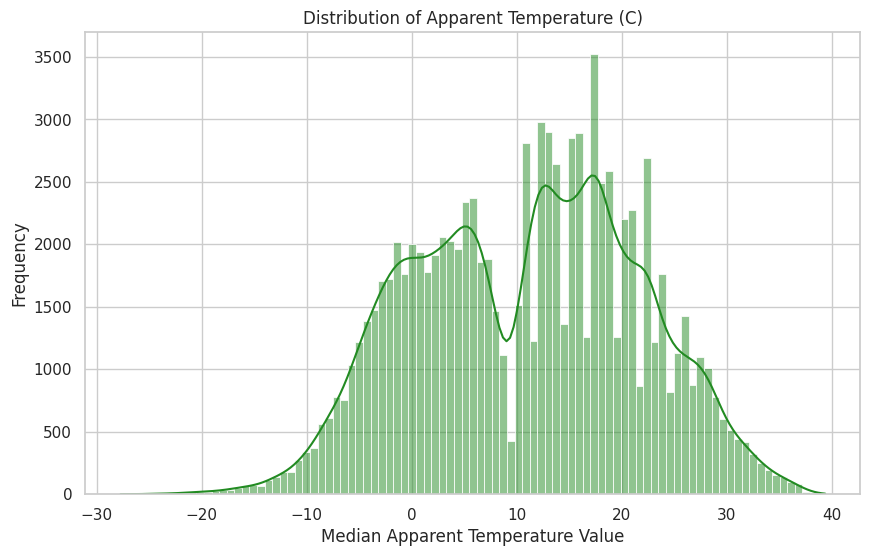

In [99]:
# Plotting the distribution of the target variable

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(cleansed_df['Apparent Temperature (C)'], color='forestgreen', kde=True)
plt.title('Distribution of Apparent Temperature (C)')
plt.xlabel('Median Apparent Temperature Value')
plt.ylabel('Frequency')
plt.show()


['rain' 'snow']


<Axes: xlabel='Precip Type', ylabel='Count'>

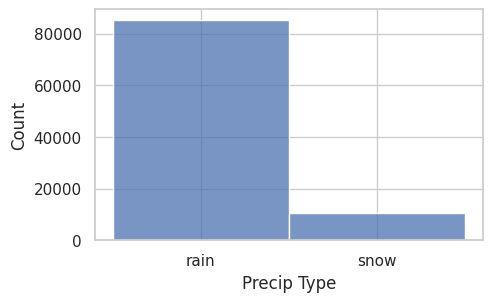

In [100]:
print(cleansed_df['Precip Type'].unique())
sns.histplot(data=cleansed_df,x='Precip Type')

In [101]:
cleansed_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [103]:
# Categorical variables in the df
categorical=[]
for col in cleansed_df.columns:
    if(cleansed_df[col].dtype == 'O'):
        categorical.append(col)
categorical

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [104]:
# Numerical variables in the df
numerical=[]
for col in cleansed_df.columns:
  if(cleansed_df[col].dtype != 'O'):
    numerical.append(col)
numerical

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [105]:
# Dropping unnecessary columns
cleansed_df.drop(columns=['Loud Cover', 'Formatted Date', 'Summary', 'Daily Summary'],inplace=True)

cleansed_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [106]:


weather_df = cleansed_df.copy()

weather_df


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


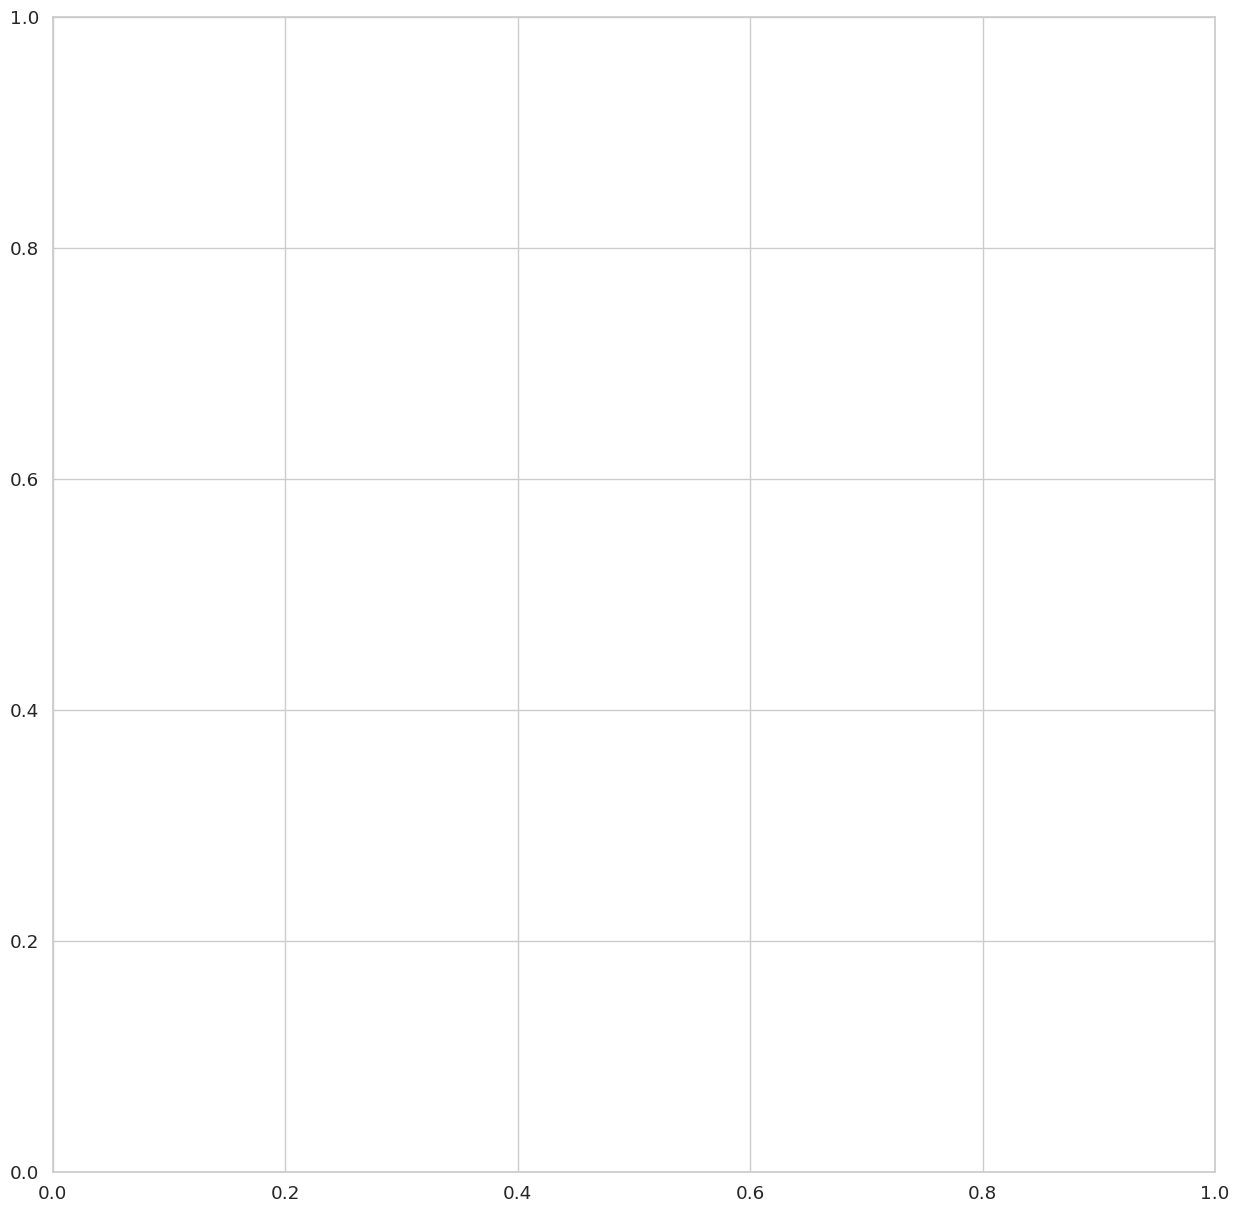

In [206]:
# Assuming these are the columns you want to check and potentially drop
columns_to_drop = ["Loud Cover", "Formatted Date", "Summary", "Daily Summary"]

# Filter the list to include only columns that exist in your DataFrame
columns_to_drop = [col for col in columns_to_drop if col in cleansed_df.columns]

# Now, safely drop these columns from your DataFrame
if columns_to_drop:
    data_without_outliers = cleansed_df.drop(columns_to_drop, axis=1)
else:
    data_without_outliers = cleansed_df

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
sns.boxplot(data=data_without_outliers, orient="h")
plt.show()


Before Shape: (95890, 8)
After Shape: (95889, 8)


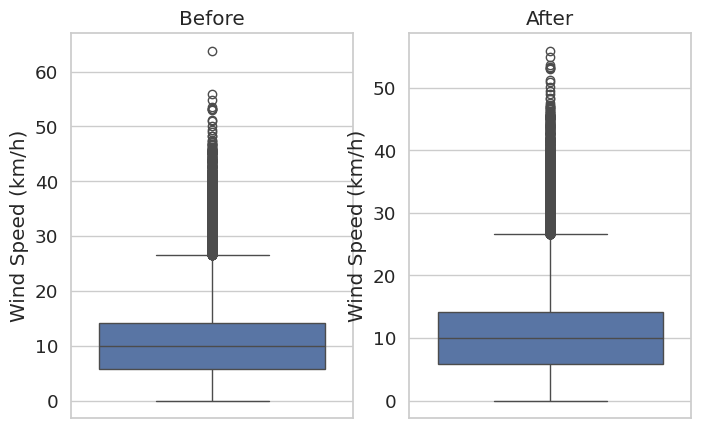

Before Shape: (95889, 8)
After Shape: (94601, 8)


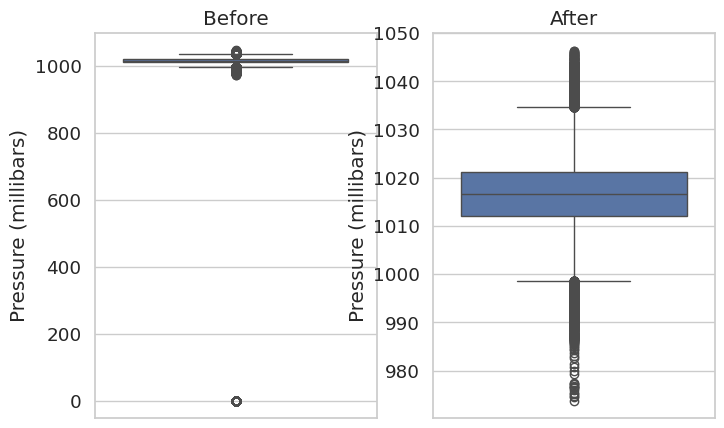

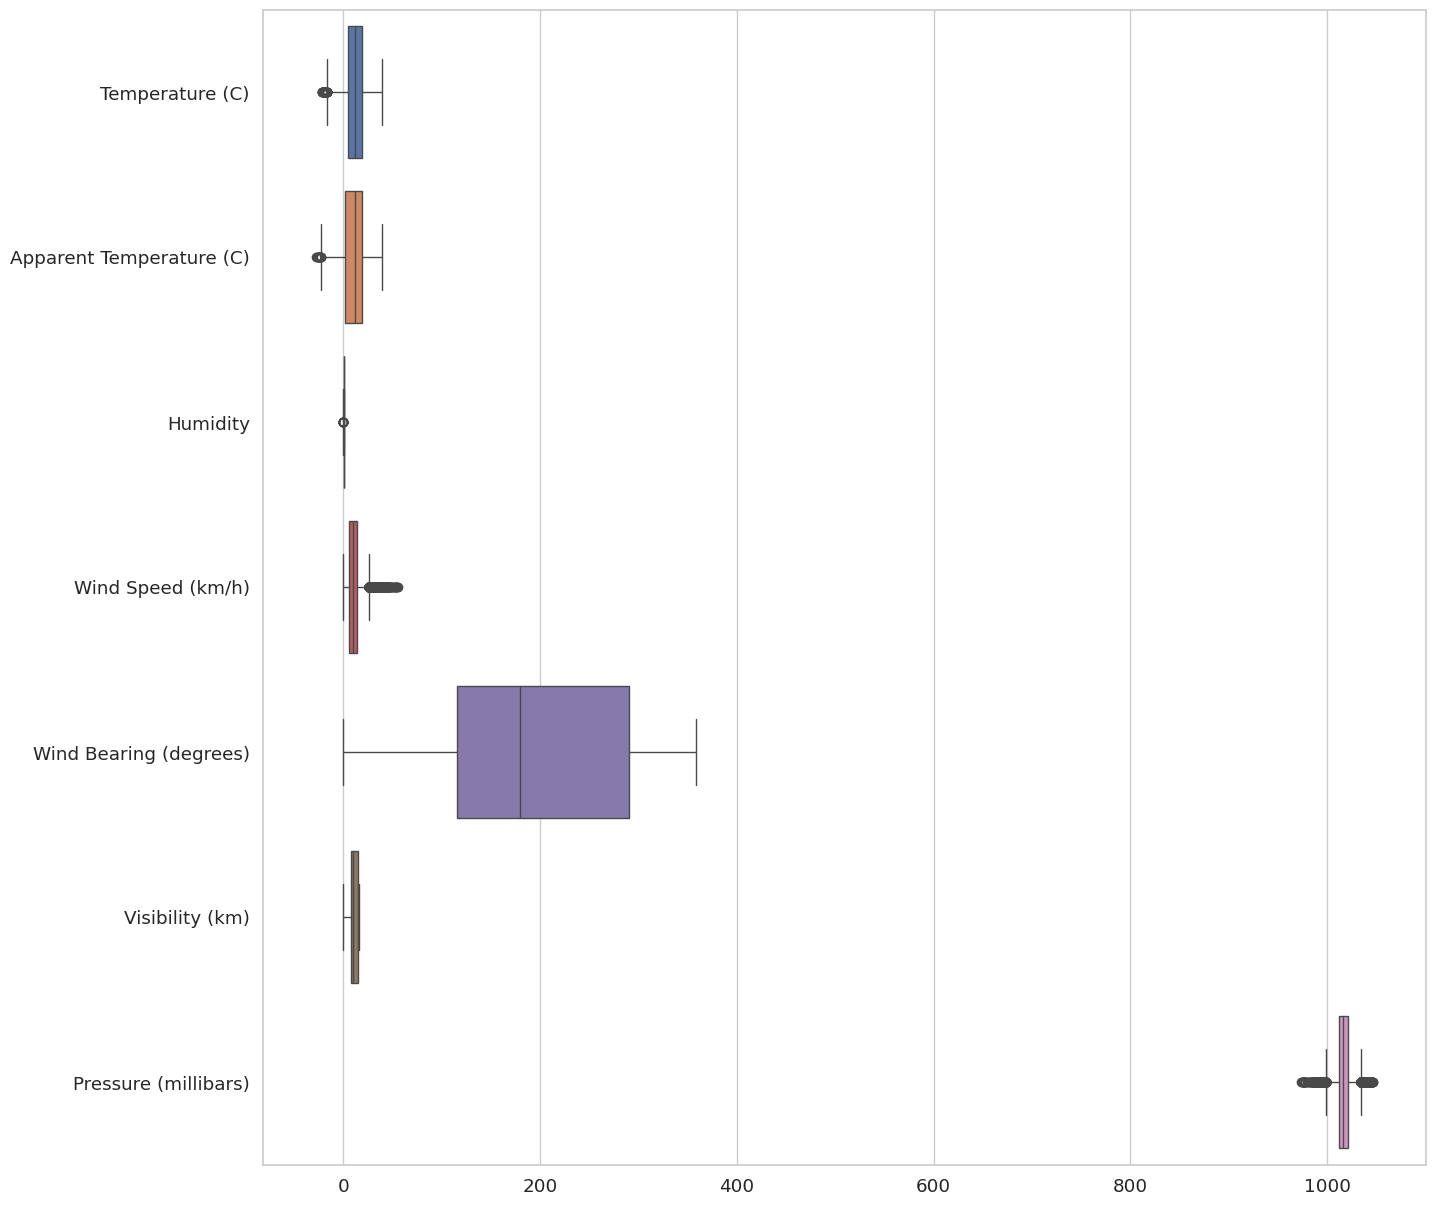

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Wind Speed analysis
fig, axes = plt.subplots(1, 2)
print("Before Shape:", humidity_set.shape)
wind_speed_data = humidity_set[humidity_set['Wind Speed (km/h)'] < 60]
print("After Shape:", wind_speed_data.shape)

sns.boxplot(humidity_set["Wind Speed (km/h)"], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(wind_speed_data["Wind Speed (km/h)"], orient='v', ax=axes[1])
axes[1].set_title("After")
plt.show()

# Pressure analysis
fig, axes = plt.subplots(1, 2)
print("Before Shape:", wind_speed_data.shape)
pressure_data = wind_speed_data[wind_speed_data['Pressure (millibars)'] > 0]
print("After Shape:", pressure_data.shape)

sns.boxplot(wind_speed_data["Pressure (millibars)"], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(pressure_data["Pressure (millibars)"], orient='v', ax=axes[1])
axes[1].set_title("After")
plt.show()

# Update your final cleaned dataset
data2 = pressure_data

# Final boxplot for all numerical features after cleaning, excluding "Summary" and "Precip Type"
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
# Ensure these columns exist before attempting to drop them
columns_to_check = ["Summary", "Precip Type"]
columns_to_drop = [col for col in columns_to_check if col in data2.columns]
data_without_outliers = data2.drop(columns=columns_to_drop, axis=1)
sns.boxplot(data=data_without_outliers, orient="h")
plt.show()


Q-Q plots


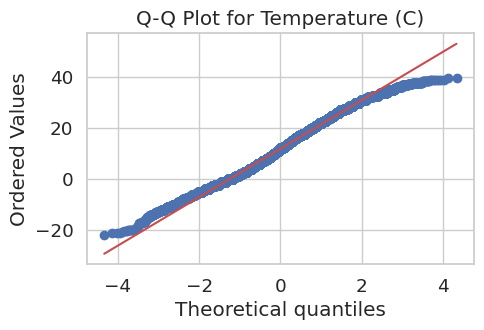

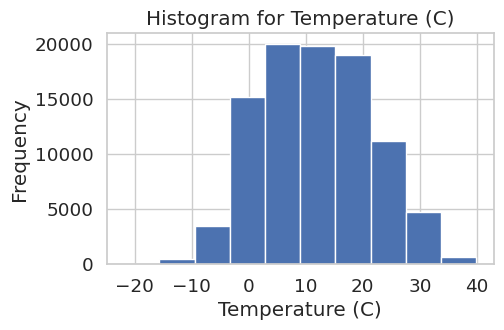

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Ensure data2 is your final cleaned DataFrame
# Set plot aesthetics
sns.set(rc={'figure.figsize':(5,3)}, font_scale=1.2, style='whitegrid')

# Q-Q plot for "Temperature (C)"
stats.probplot(data2["Temperature (C)"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Temperature (C)")
plt.show()

# Histogram for "Temperature (C)"
data2["Temperature (C)"].hist()
plt.title("Histogram for Temperature (C)")
plt.xlabel("Temperature (C)")
plt.ylabel("Frequency")
plt.show()


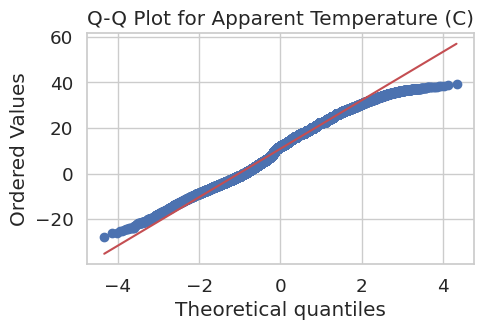

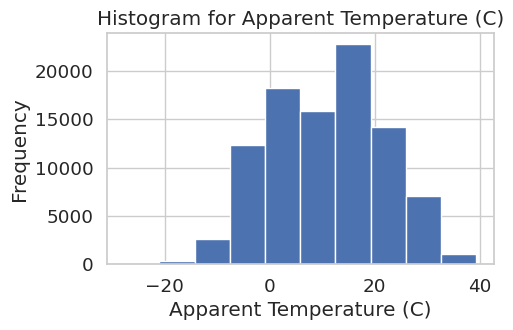

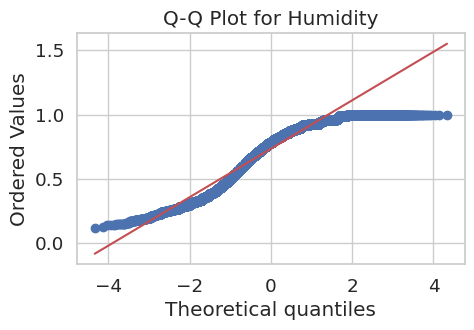

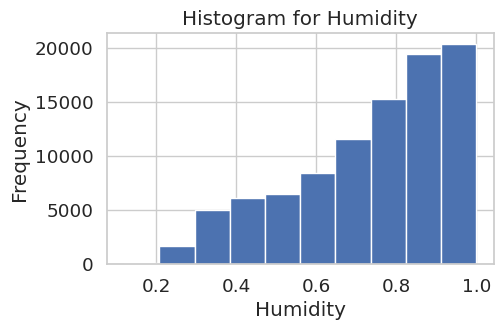

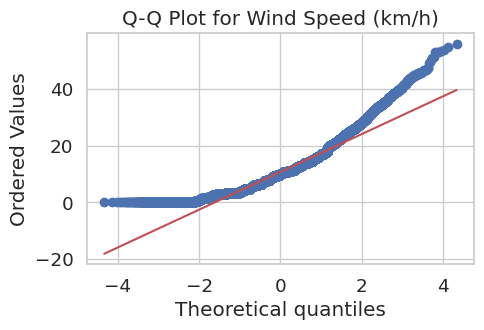

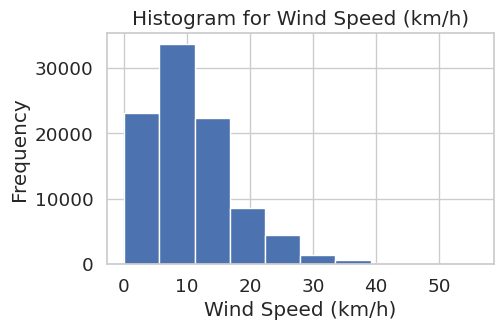

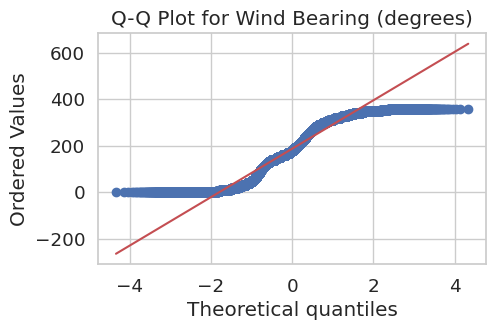

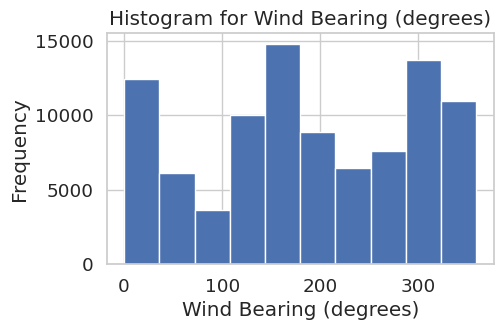

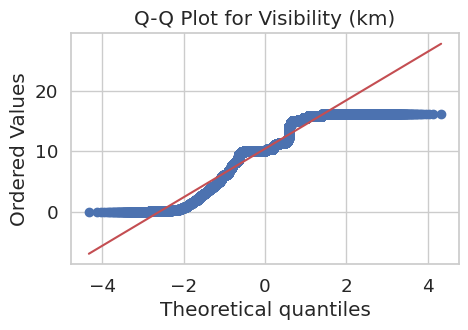

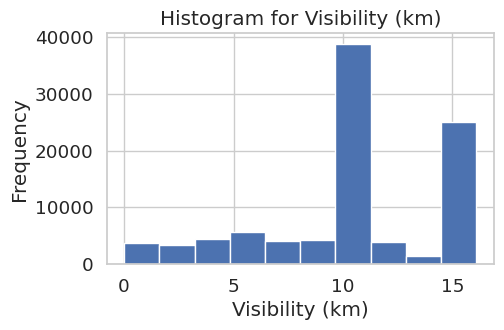

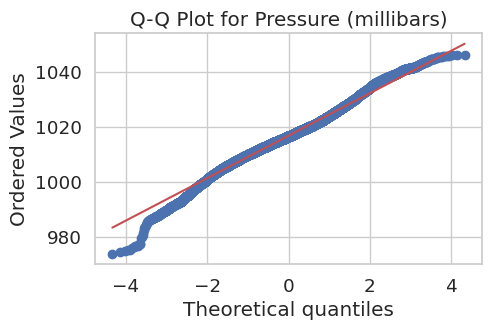

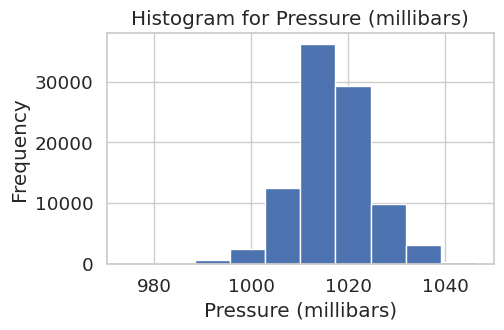

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set plot aesthetics
sns.set(style='whitegrid', font_scale=1.2)

# Combined list of variables to plot
variables = [
    "Apparent Temperature (C)",
    "Humidity",
    "Wind Speed (km/h)",
    "Wind Bearing (degrees)",
    "Visibility (km)",
    "Pressure (millibars)"
]

# Generating Q-Q plots and histograms for each variable
for var in variables:
    # Q-Q plot for the variable
    plt.figure(figsize=(5, 3))
    stats.probplot(data2[var], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {var}")
    plt.show()

    # Histogram for the variable
    plt.figure(figsize=(5, 3))
    data2[var].hist()
    plt.title(f"Histogram for {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


**Correlation Heatmap**

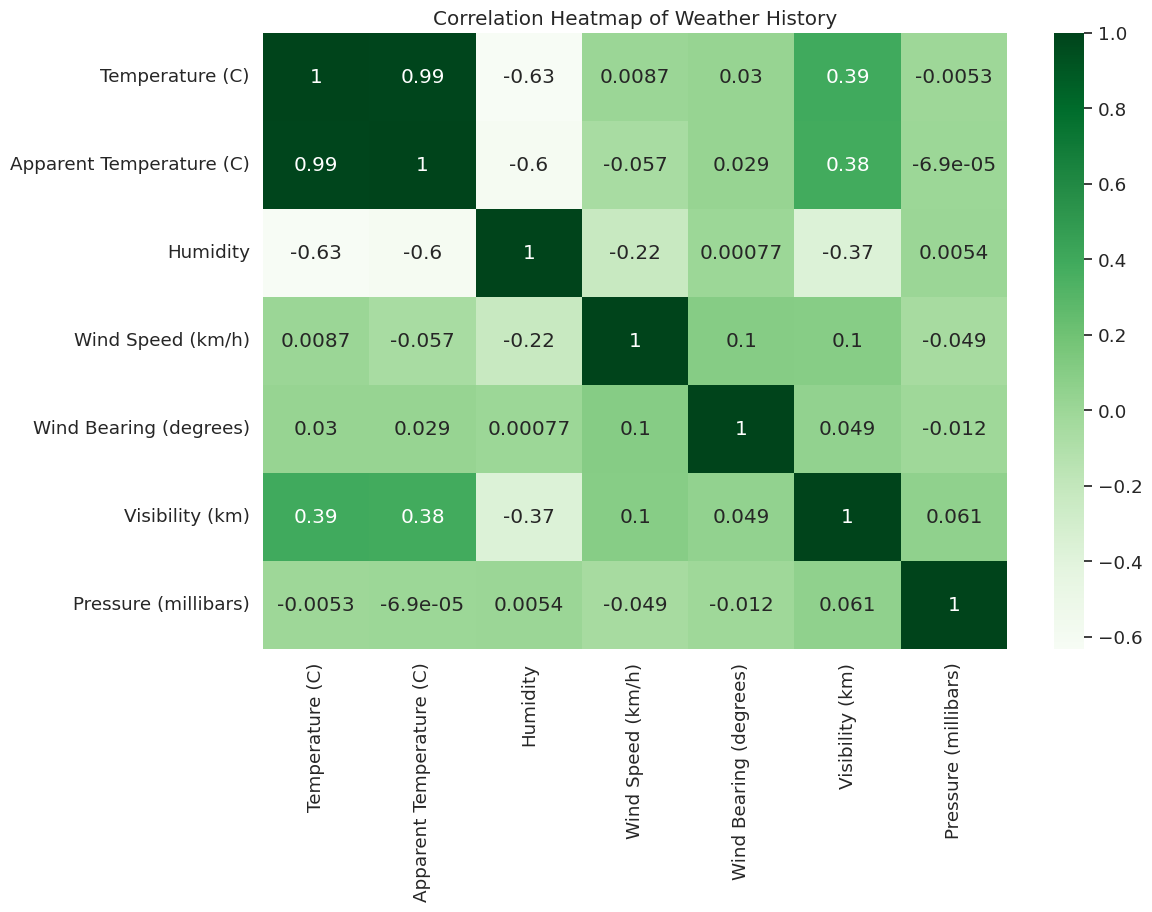

In [112]:
# Finding out the relations between the predictor variables and target variables using heatmap


plt.figure(figsize=(12, 8))
sns.heatmap(weather_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Weather History')
plt.show()

Thus from the heatmap, it's clear that Apparent Temperature which is our Target variable/ Dependent variable is having strong co-relation with Temperature which is our predictor/ Independent Variable. Thus, we can apply *linear regression* happily as there is one dependent and independent variable.

Testing & Training

In [113]:
#Which predictor variables are the most important?(apparent temperature)
data_features= data2.drop('Apparent Temperature (C)', axis=1)
target_data= pd.DataFrame(data2['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features, target_data, test_size = 0.2, random_state = 101)

x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [207]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Ensure the 'Summary' column exists in x_train and x_test
if 'Summary' in x_train.columns and 'Summary' in x_test.columns:
    # creating instance of one-hot-encoder
    onehot_encoder = OneHotEncoder(handle_unknown='ignore')

    # Fitting the encoder on the 'Summary' column
    onehot_encoder.fit(x_train[['Summary']])
    column_names = onehot_encoder.get_feature_names_out(['Summary'])

    # Transforming training and testing data
    onehot_encoder_train_df = pd.DataFrame(onehot_encoder.transform(x_train[['Summary']]).toarray(), columns=column_names)
    onehot_encoder_test_df = pd.DataFrame(onehot_encoder.transform(x_test[['Summary']]).toarray(), columns=column_names)

    # Joining the one-hot encoded columns back to the original DataFrame
    x_train = x_train.join(onehot_encoder_train_df)
    x_test = x_test.join(onehot_encoder_test_df)

    # Dropping the original 'Summary' column as it's now encoded
    x_train.drop('Summary', axis=1, inplace=True)
    x_test.drop('Summary', axis=1, inplace=True)



In [116]:
x_train["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)

In [117]:
x_train['Precip Type']=x_train['Precip Type'].astype('category')
x_train['Precip Type']=x_train['Precip Type'].cat.codes

# label encoding for Precip Type - Testing Data
x_test['Precip Type']=x_test['Precip Type'].astype('category')
x_test['Precip Type']=x_test['Precip Type'].cat.codes

In [118]:
from sklearn.preprocessing import StandardScaler

feature_columns = ['Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
# for feature data
x_train_standardize = x_train[feature_columns].copy()
x_test_standardize = x_test[feature_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(x_train_standardize)
x_train_scaled = scaler.transform(x_train_standardize)
x_test_scaled = scaler.transform(x_test_standardize)
df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)

In [119]:
target_columns = ['Apparent Temperature (C)']
# for target data
y_train_standardize = y_train[target_columns].copy()
y_test_standardize = y_test[target_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(y_train_standardize)
y_train_scaled = scaler.transform(y_train_standardize)
y_test_scaled = scaler.transform(y_test_standardize)
df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)

x_train[feature_columns] = df_standardized_x_train
x_test[feature_columns] = df_standardized_x_test
y_train[target_columns] = df_standardized_y_train
y_test[target_columns] = df_standardized_y_test

In [120]:
print(x_train.describe(include="all"))

        Precip Type  Temperature (C)      Humidity  Wind Speed (km/h)  \
count  75680.000000     7.568000e+04  7.568000e+04       7.568000e+04   
mean       0.111879    -1.220541e-18 -2.243918e-16       6.759920e-17   
std        0.315220     1.000007e+00  1.000007e+00       1.000007e+00   
min        0.000000    -3.527673e+00 -3.136734e+00      -1.563112e+00   
25%        0.000000    -7.667536e-01 -6.891682e-01      -7.241610e-01   
50%        0.000000     7.905474e-03  2.286690e-01      -1.282487e-01   
75%        0.000000     7.216363e-01  8.405604e-01       4.840220e-01   
max        1.000000     2.823370e+00  1.350470e+00       6.555317e+00   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
count            7.568000e+04     7.568000e+04          7.568000e+04  
mean             4.896248e-17     8.309069e-17          3.195198e-14  
std              1.000007e+00     1.000007e+00          1.000007e+00  
min             -1.743657e+00    -2.490686e+00         -5.

Testing & Training

In [142]:
# Setting the X and y for fitting the data

X = weather_df['Temperature (C)']

y = weather_df['Apparent Temperature (C)']

In [143]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42) #Splitting 30% of data into test data

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 67138 samples
Test set size: 28774 samples


# **Training the data for Linear Regression**

In [144]:
X_train

84173     8.800000
32787    10.000000
14187     3.355556
19474    -4.866667
55742     0.000000
           ...    
6265     14.511111
54988     0.466667
76987     5.627778
860      19.161111
15795     5.000000
Name: Temperature (C), Length: 67138, dtype: float64

In [145]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Temperature (C)
84173,1.0,8.800000
32787,1.0,10.000000
14187,1.0,3.355556
19474,1.0,-4.866667
55742,1.0,0.000000
...,...,...
6265,1.0,14.511111
54988,1.0,0.466667
76987,1.0,5.627778
860,1.0,19.161111


In [146]:
# Fit the Ordinary Least Squares model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.985
Model:                                  OLS   Adj. R-squared:                  0.985
Method:                       Least Squares   F-statistic:                 4.487e+06
Date:                      Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                              02:31:18   Log-Likelihood:            -1.1283e+05
No. Observations:                     67138   AIC:                         2.257e+05
Df Residuals:                         67136   BIC:                         2.257e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

# Prediction and Testing using Linear Regression

In [147]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

93007     8.696877
95787    19.542355
52496    22.375636
43630    12.307921
79369     8.783295
           ...    
47396    -1.191829
3406     -5.327555
47517    25.603971
69400    21.647254
85992     1.517997
Length: 28774, dtype: float64

In [148]:
X_test_const

,const,Temperature (C)
93007,1.0,9.988889
95787,1.0,19.750000
52496,1.0,22.300000
43630,1.0,13.238889
79369,1.0,10.066667
...,...,...
47396,1.0,1.088889
3406,1.0,-2.633333
47517,1.0,25.205556
69400,1.0,21.644444


# Checking OLS Assumptions


**1. Linearity**

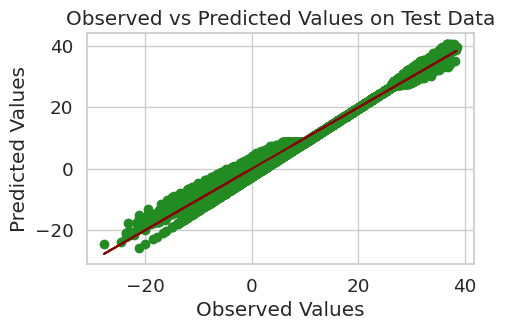

In [149]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

Positive Linear Relationship: The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

**2. Random Sample**

In [150]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

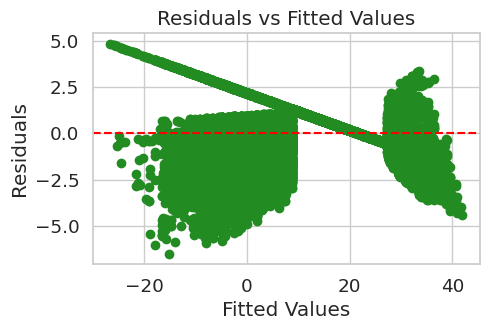

In [151]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Train/Test/Evaluation of the linear Regression model


In [152]:
from sklearn.linear_model import LinearRegression
# Create and fitting the model
lr = LinearRegression()

lr.fit(X_train_const, y_train)

#  Predictions of the model
y_pred = lr.predict(X_test_const)

print(y_pred)

[ 8.69687675 19.54235497 22.37563585 ... 25.60397115 21.64725428
  1.51799731]


# Validation of the linear regression model using MAE, MSE, RMSE


In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# MAE validation
print(f"The mean absolute error of the model is: \n {mean_absolute_error(y_test ,y_pred)}")

# MSE validation
print(f"The mean squared error of the model is: \n {mean_squared_error(y_test ,y_pred)}")

#RMSE validation
print(f"The root mean squared error of the model is: \n {sqrt(mean_squared_error(y_test ,y_pred))}")

The mean absolute error of the model is: 
 0.9929192613433013
The mean squared error of the model is: 
 1.6812156008094474
The root mean squared error of the model is: 
 1.2966169830792158


**Scaling the data**

In [154]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_const)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test_const)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')
print(f'MSE on Test Set: {mse}')

RMSE on Test Set: 1.2966169830792158
MSE on Test Set: 1.6812156008094472


**Accuracy Score**

In [156]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print('The accuracy score is :',r_squared)

The accuracy score is : 0.9854658614257321


# Analysis of the linear model:

# SHAP ANALYSIS ON THE LINEAR MODEL

Because, we've trained our model using only one predictor varaible, it's practically useless to perform SHAP analysis. Hence, I am re-training the model with all the features.


In [157]:
weather_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [158]:
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

target = ['Apparent Temperature (C)']

X = weather_df[features]

y = weather_df[target]

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 76729 samples
Test set size: 19183 samples


# Training the model on OLS method

In [159]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
78813,1.0,17.200000,0.96,3.1556,301.0,6.5688,1014.32
69069,1.0,17.600000,0.66,19.8513,170.0,15.9229,1019.64
61492,1.0,9.355556,0.96,10.8192,299.0,15.8263,1013.98
11409,1.0,-0.022222,0.58,26.1464,149.0,9.9820,1018.20
22768,1.0,9.238889,0.51,23.2967,306.0,11.3988,1012.91
...,...,...,...,...,...,...,...
788,1.0,19.338889,0.70,7.3255,280.0,11.3988,1008.55
93019,1.0,5.638889,0.73,10.9319,253.0,15.0213,1013.01
74569,1.0,17.777778,0.87,6.4400,340.0,16.0517,1017.15
28044,1.0,-7.222222,0.88,25.7600,70.0,3.5420,1004.40


In [160]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.250e+06
Date:                      Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                              02:31:20   Log-Likelihood:            -1.1473e+05
No. Observations:                     76729   AIC:                         2.295e+05
Df Residuals:                         76722   BIC:                         2.295e+05
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [161]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

69739    13.774540
85732     6.007689
46129    -4.152735
11355     0.513335
6854     -2.148881
           ...    
75927     6.722036
62331    15.073713
29395    -1.814144
95953    14.715275
62653    35.323051
Length: 19183, dtype: float64

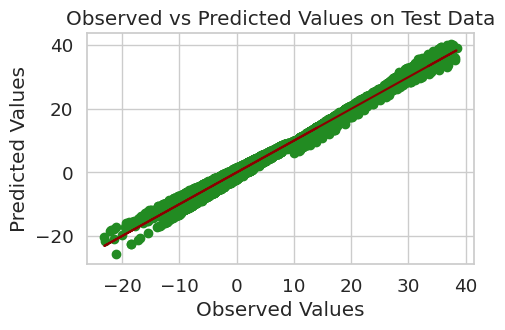

In [162]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [163]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 1.0748664111915343


In [165]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.5 MB/s eta 0:00:00


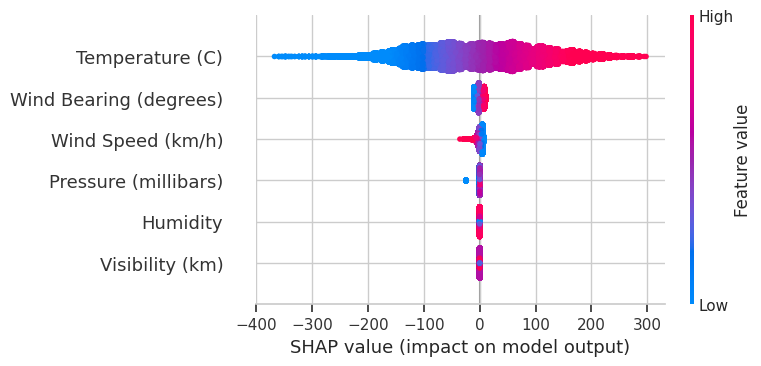

In [166]:
import shap
import pandas as pd

explainer = shap.LinearExplainer(lr, X )
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# Fitting the tree model

Fitting the decision tree


In [ ]:
weather_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
tree_df = weather_df.copy()
tree_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
X = tree_df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]

y = tree_df['Apparent Temperature (C)']

In [ ]:
# Specifying the target and predictor variables again for safe side

#X = weather_df['Temperature (C)']

#y = weather_df['Apparent Temperature (C)']

# Since, for decision tree I need to give them in 2D array format, otherwise it's gonna throw an error. I am reshaping them into 2D array

# import numpy as np

# print(weather_df['Apparent Temperature (C)'].dtype)
# print(type(weather_df['Temperature (C)']))
# print(weather_df['Temperature (C)'].shape)

In [ ]:

from sklearn.tree import DecisionTreeRegressor

# Creating the decision tree regressor model
tree_regressor = DecisionTreeRegressor(random_state=1)


# Fitting the model with your predictor and target variables
tree_regressor.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [172]:
print("Making predictions for the following 5 records:")
print(X.head())
print("The predictions are")
print(tree_regressor.predict(X.head()))

Making predictions for the following 5 records:
   Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0         9.472222      0.89            14.1197                   251.0   
1         9.355556      0.86            14.2646                   259.0   
2         9.377778      0.89             3.9284                   204.0   
3         8.288889      0.83            14.1036                   269.0   
4         8.755556      0.83            11.0446                   259.0   

   Visibility (km)  Pressure (millibars)  
0          15.8263               1015.13  
1          15.8263               1015.63  
2          14.9569               1015.94  
3          15.8263               1016.41  
4          15.8263               1016.51  
The predictions are
[7.38888889 7.22777778 9.37777778 5.94444444 6.97777778]


# Validations


In [173]:
#MAE
from sklearn.metrics import mean_absolute_error

predicted_app_temp = tree_regressor.predict(X)
mean_absolute_error(y, predicted_app_temp)

4.849287345322856e-15

In [174]:
# Training and testing split

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)
# # Defining model
# temp_model = DecisionTreeRegressor()
# # Fit model
# temp_model.fit(train_X, train_y)

# # get predicted prices on validation data
# val_predictions = temp_model.predict(val_X)
# print(mean_absolute_error(val_y, val_predictions))

In [175]:
pip install shap


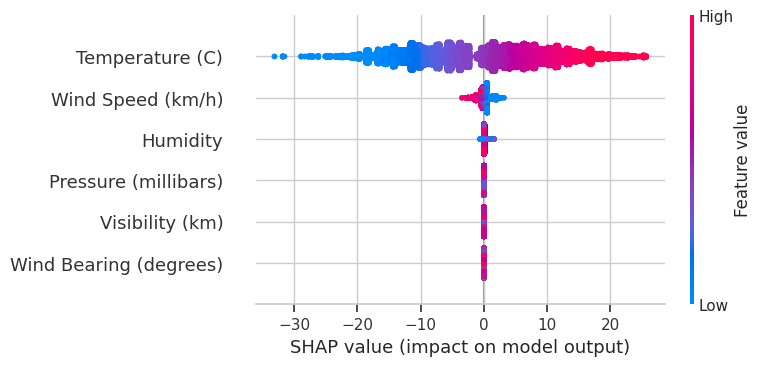

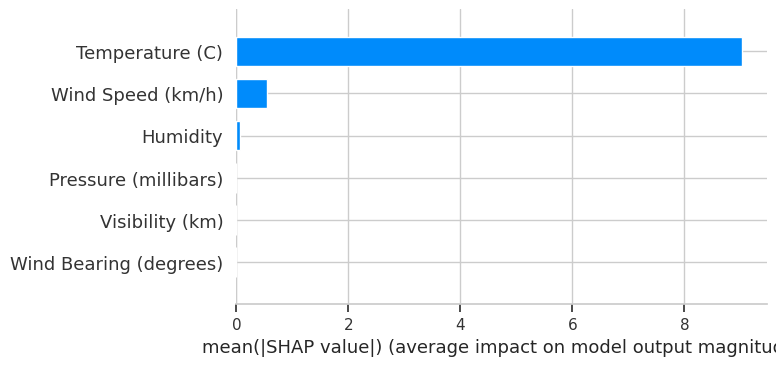

In [176]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor

# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds_val)
#     return(mae)

# # compare MAE with differing values of max_leaf_nodes
# for max_leaf_nodes in [5, 50, 500, 5000]:
#     my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

import shap
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Select the model with the desired max_leaf_nodes (e.g., 100)
model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
model.fit(train_X, train_y)
explainer = shap.TreeExplainer(model)

shap_values = explainer(val_X)

# Visualize feature importance
shap.summary_plot(shap_values, val_X)
shap.summary_plot(shap_values, val_X, plot_type="bar")



#  AutoML

In [178]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 1.8 MB/s eta 0:00:00


In [179]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})

In [180]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [181]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [182]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:14746..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpna42kuho
  JVM stdout: /tmp/tmpna42kuho/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpna42kuho/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14746
Connecting to H2O server at http://127.0.0.1:14746 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_4oiv2x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Exploratory Data Analysis (EDA)

In [183]:
from google.colab import drive
drive.mount('/content/drive')

pandas_df = pd.read_csv('/content/drive/MyDrive/datascience/weatherHistory.csv')
pandas_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [184]:
pandas_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [185]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [186]:
pandas_df.isnull().sum()  # Checking for any null values in the dataset

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
new_df = pandas_df.dropna(axis=0, how='any')
print(new_df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [189]:
print("Num of Duplicates:" + str(new_df.duplicated().sum()))
new_df=new_df.drop_duplicates()
print("Num_of duplicates after :" + str(new_df.duplicated().sum()))
new_df=new_df.reset_index(drop=True)

Num of Duplicates:24
Num_of duplicates after :0


In [190]:
new_df.shape

(95912, 12)

In [191]:
final_df = new_df.drop(['Formatted Date', 'Daily Summary', 'Loud Cover'], axis=1)

We removed the "Formatted Date" column due to its uniformity of unique values, making it less useful for pattern recognition. Similarly, the "Loud Cover" column, containing only the value 0, was dropped. Additionally, we eliminated the "Daily Summary" column, as its information significantly overlapped with the "Summary" column.







In [192]:
final_df.shape

(95912, 9)

In [193]:
columns = list(final_df.columns)
print(columns)

['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


In [194]:
final_df.describe()  # Statistical description of our dataset

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,1003.146959
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,117.291484
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,1011.890000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


The dataset contains 95912 observations and 7 variables.

The "count" row indicates the number of observations for each variable, which is 95912 for all variables

The "mean" row shows the average value of each variable:

The "std" row indicates the standard deviation of each variable

The "min" and "max" rows show the smallest and largest values observed for each variable

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively. These percentiles help understand the distribution of values within each variable's dataset.

<Axes: >

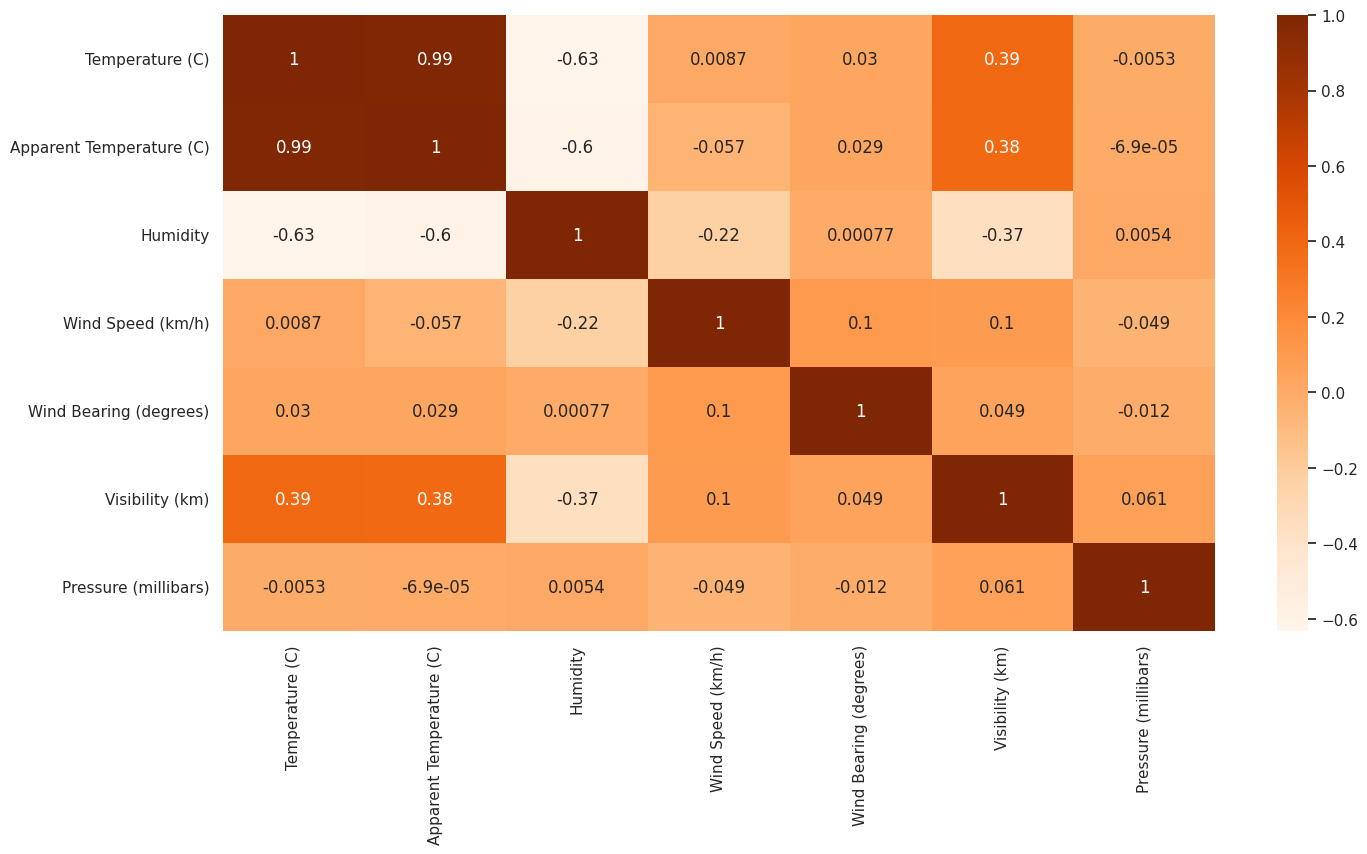

In [195]:
sns.heatmap(
    final_df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

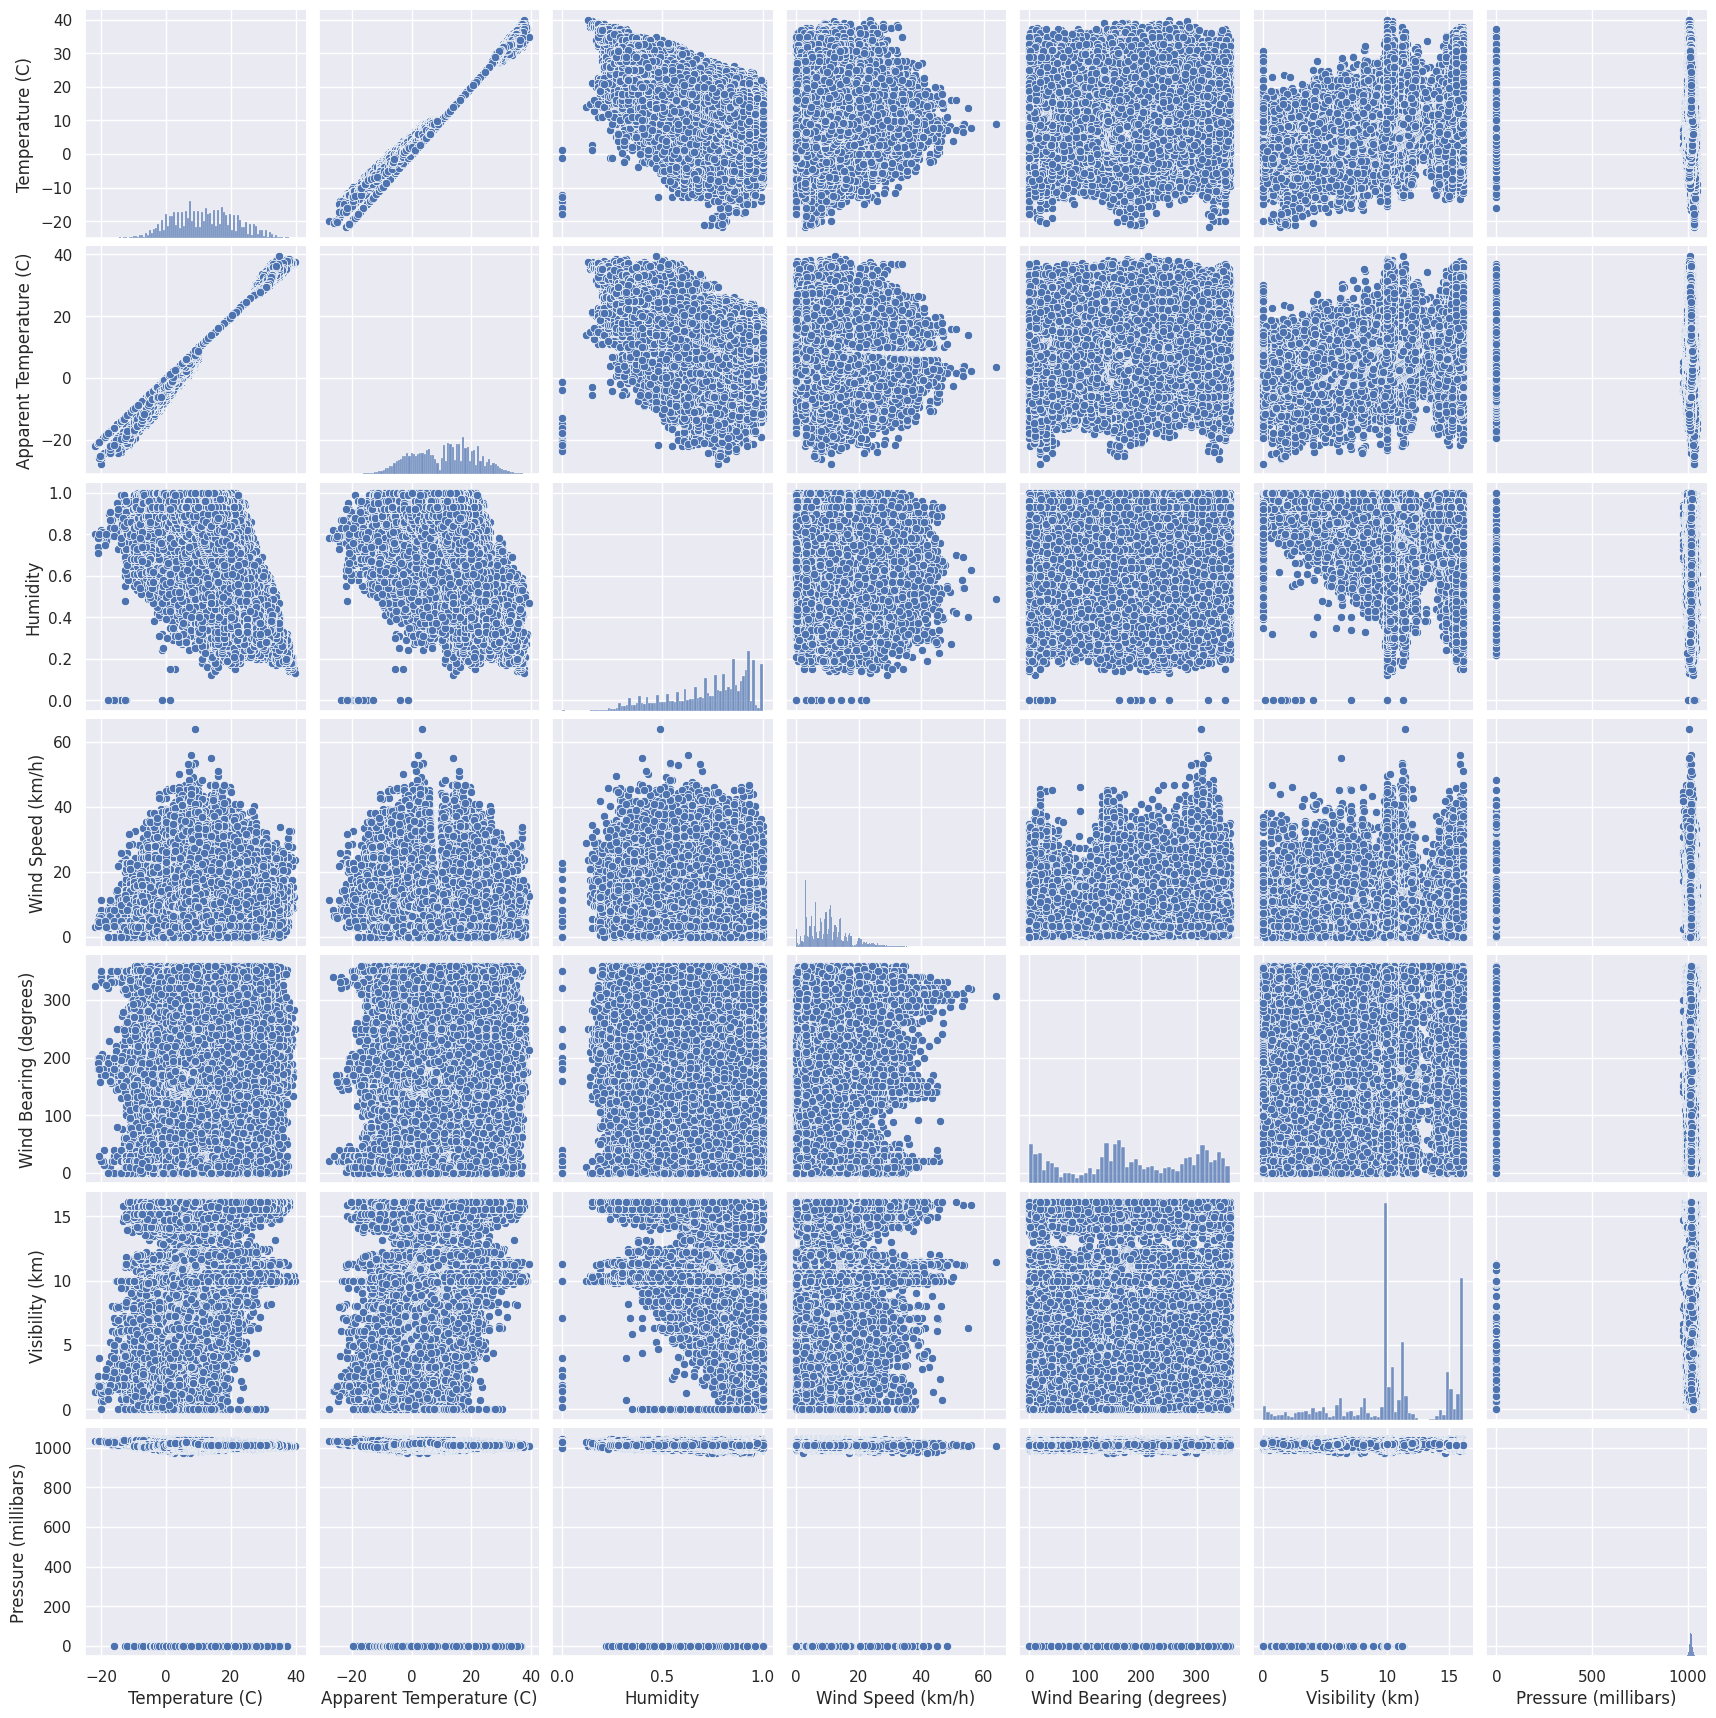

In [196]:
sns.pairplot(
    final_df
)

In [197]:
df = h2o.H2OFrame(
    final_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [198]:
df.types  # Datatype of all attributes

{'Summary': 'enum',
 'Precip Type': 'enum',
 'Temperature (C)': 'real',
 'Apparent Temperature (C)': 'real',
 'Humidity': 'real',
 'Wind Speed (km/h)': 'real',
 'Wind Bearing (degrees)': 'int',
 'Visibility (km)': 'real',
 'Pressure (millibars)': 'real'}

In [199]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [200]:
print(df_train.shape)
print(df_test.shape)

(76802, 9)
(19110, 9)


In [201]:
df_train.head()

Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Partly Cloudy,rain,9.47222,7.38889,0.89,14.1197,251,15.8263,1015.13
Partly Cloudy,rain,9.35556,7.22778,0.86,14.2646,259,15.8263,1015.63
Mostly Cloudy,rain,9.37778,9.37778,0.89,3.9284,204,14.9569,1015.94
Mostly Cloudy,rain,8.75556,6.97778,0.83,11.0446,259,15.8263,1016.51
Partly Cloudy,rain,9.22222,7.11111,0.85,13.9587,258,14.9569,1016.66
Partly Cloudy,rain,7.73333,5.52222,0.95,12.3648,259,9.982,1016.72
Partly Cloudy,rain,8.77222,6.52778,0.89,14.1519,260,9.982,1016.84
Partly Cloudy,rain,13.7722,13.7722,0.72,12.5258,279,9.982,1017.22
Partly Cloudy,rain,16.0167,16.0167,0.67,17.5651,290,11.2056,1017.42
Partly Cloudy,rain,17.1444,17.1444,0.54,19.7869,316,11.4471,1017.74


In [202]:
X = df.columns
print(X)

['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


In [203]:
# Set target and predictor variables
y = "Apparent Temperature (C)"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['Summary', 'Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


In [204]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [205]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |████████████████████████████████████████████████████ (cancelled)  82%


H2OJobCancelled: Job<$03017f0000019b39ffffffff$_a416585c372228101c3bc30429724c11> was cancelled by the user.

In [ ]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

In [ ]:
best_model.algo

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable importance graph on the h20 distributed Random forest model


*   We can interpret that temperature has the highest most importantance among other variables
*   precipitation type, humidity have the next significance relation but very low inthe scale of 1.0



In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

In [ ]:
predictions = best_model.predict(df_test)

In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

In [ ]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

In [ ]:
print(X)

**REGULARIZATION**

Regularization is a technique used in linear regression to prevent overfitting and enhance generalization by adding a penalty term to the loss function. Ridge and Lasso are two popular regularization techniques.

Ridge regularization adds a penalty term proportional to the square of coefficients, which shrinks them towards zero. It helps to avoid overfitting and reduces model variance, especially when dealing with correlated input variables.

Lasso regularization is similar, but uses a penalty term proportional to the absolute value of coefficients. Unlike Ridge, Lasso can set some coefficients to zero, making it an excellent technique for feature selection and leading to simpler models.

Both techniques differ in the penalty function they use. Ridge uses L2 regularization, which evenly distributes penalties across all coefficients, while Lasso uses L1 regularization, which concentrates penalties on vital coefficients.

The choice between Ridge and Lasso depends on the specific problem and input variable properties. If the input variables have high correlations, Ridge may be a better choice. But, if the goal is to find the most important features, Lasso may be a better choice.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

weather_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
weather_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
weather_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
weather_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code creates two generalized linear regression models using H2O. Each model uses a different regularization method: Ridge and Lasso. For Ridge regularization, the model has "alpha" set to 0, indicating Ridge. It uses a Gaussian error distribution for continuous response variables and 5-fold cross-validation to evaluate performance. For Lasso regularization, the model is similar but with "alpha" set to 1, indicating Lasso. Both models use H2O's ability to search for optimal lambda values for L1 and L2 regularization.

In [ ]:
weather_glm.train(x=X, y=y, training_frame=df_train)

Ridge Regularization

In [ ]:
weather_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

Lasso Regularization

In [ ]:
weather_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

Which Regularization helps:

For Lasso Regularization:

Train Data Metrics:
MSE: 1.1527
RMSE: 1.0737
MAE: 0.8448
R^2: 0.9900
Cross-Validation Metrics:
MSE: 1.1562
RMSE: 1.0753
MAE: 0.8463
R^2: 0.9899

For Ridge Regularization:

Train Data Metrics:
MSE: 1.1699
RMSE: 1.0816
MAE: 0.8568
R^2: 0.9898
Cross-Validation Metrics:
MSE: 1.1862
RMSE: 1.0891
MAE: 0.8636
R^2: 0.9897


Based on the metrics, Lasso regularization is the superior choice over Ridge regularization. It achieves significantly lower values of MSE, RMSE, and MAE on both the train data and cross-validation data. Furthermore, it demonstrates a higher R^2 value, indicating superior explanatory power. Therefore, it is safe to conclude that Lasso regularization is the better choice for this specific dataset and task.

In [ ]:
lambda_search = weather_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

In [ ]:
lambda_search

In [ ]:
coeff_table = weather_glm._model_json["output"]["coefficients_table"]

In [ ]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

In [ ]:
exa = aml.explain(df_test)

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pandas_df['Apparent Temperature (C)'], pandas_df[[

 'Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']]).fit()

# Print out the statistics
model.summary()

In [ ]:
import h2o

pandas_df = h2o.as_list(df)

In [ ]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2

In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

Hyperparameter tuning analysis

This highlights the findings of a hyperparameter tuning analysis performed on an XGBoost model. The study entailed a grid search on four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate, to identify the optimal combination of hyperparameters based on the lowest Residual Deviance, which was used as an evaluation metric.

The analysis examined a total of 36 hyperparameter combinations. The study found that the col_sample_rate of 0.3, learn_rate of 0.03, max_depth of 8, and sample_rate of 1.0 produced the lowest Residual Deviance. The worst-performing models had Residual Deviances above 0.43, while the next best models had Residual Deviances in the range of 0.36-0.39.

The results highlight the potential of hyperparameter tuning in optimizing XGBoost model performance. The study emphasizes the importance of evaluating hyperparameters and Residual Deviance to identify the optimal combination of hyperparameters and improve model performance.

Overall, the report provides valuable insights into the impact of hyperparameters on XGBoost models and demonstrates the potential for hyperparameter tuning to deliver significant improvements in model performance.

Conclusion:

In summary, the regression analysis that aimed to predict the apparent temperature has shown that a linear model, specifically using Ordinary Least Squares (OLS), has achieved an impressive accuracy of 0.98. This high level of accuracy indicates that linear models are effective in capturing the relationship between the variables in our dataset and accurately predicting the apparent temperature. The success of the OLS model in this context emphasizes the potential of linear regression techniques to provide reliable and accurate forecasts in meteorological studies.

Questions:
1. What is the question?

The dataset used can be used as classification as well as a regression model, where i have used regression approch to predict the  apparent temperature based on the relative temperature, humidity, pressure and wind speed other features.

2. What did you do?

To determine the most important predictor variables for the apparent temperature, I used a linear regression model. During the model training process, we split the data into training and testing sets to evaluate the model's performance on unseen data. To interpret the model's predictions, I utilized techniques like SHAP, as well as AutoML's explainability features to transparently evaluate the model's performance.


3. How well did it work?

After observing different values of MAE and MSE, I found that the OLS method has the least accuracy with 0.98. Hence, it predicts the apparent temperature most accurately.

4. What did you learn?

I learned about regression methods to predict target variables, and there may be many methods and underlying data analysis to check for overfitting and underfitting. Testing and validating the particular methods can help determine which method fits best in predicting.

Reference:

https://sachinmamoru.medium.com/build-a-machine-learning-model-for-a-weather-dataset-66b95e525052

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

https://github.com/Rampy1799/Machine_Learning/blob/main/Interpretability_of_model.ipynb

MIT License

Copyright (c) 2024 Tejaswitallapally

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.